In [4]:
from spyglass.ripple.v1 import RippleTimesV1
from spyglass.common import interval_list_intersect
import numpy as np

import os
import matplotlib.pyplot as plt
os.chdir("/home/sambray/Documents/MS_analysis_samsplaying/")
from ms_opto_stim_protocol import OptoStimProtocol
from Analysis.utils import filter_opto_data


## W-track. Run Sessions

datasets: 19
datasets: 11
datasets: 26
datasets: 16
datasets: 8
datasets: 10
datasets: 8
datasets: 16


Text(0.5, 0.98, 'Ripple Rate During Run epochs')

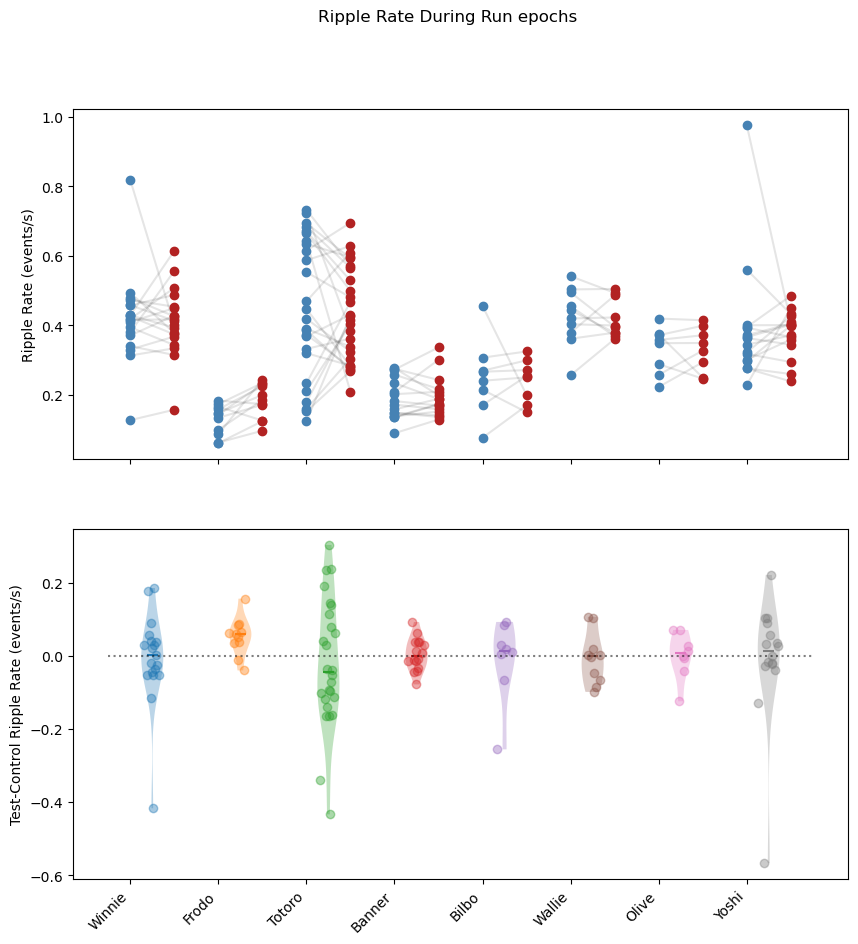

In [6]:
animal_list =  ['Winnie','Frodo',"Totoro",'Banner','Bilbo',"Wallie",'Olive','Yoshi']


fig, ax = plt.subplots(figsize=(10,10),nrows=2,sharex=True)

for loc, animal in enumerate(animal_list):
    dataset_key = {'animal':animal,
                #    "period_ms":80,
                "min_pulse_length":20,
                "track_type":'wtrack'
                
                }



    dataset = filter_opto_data(dataset_key,)
    nwb_file_names = dataset.fetch("nwb_file_name")
    interval_list_names = dataset.fetch("interval_list_name")


    test_ripple_rate = []
    control_ripple_rate = []
    for nwb_file_name, interval_list_name in zip(nwb_file_names, interval_list_names):
        basic_key = {"nwb_file_name":nwb_file_name,
                    "interval_list_name":interval_list_name,}
        ripple_key = {"nwb_file_name":nwb_file_name,
                    "target_interval_list_name":interval_list_name,}
        if not RippleTimesV1() & ripple_key:
            print("No ripples for {}".format(ripple_key))
            continue
        


        ripple_df = (RippleTimesV1() & ripple_key).fetch1_dataframe()
        all_ripples = [[start, end] for start, end in zip(ripple_df.start_time, ripple_df.end_time)]   
        control_intervals = (OptoStimProtocol & basic_key).fetch1('control_intervals')
        test_intervals = (OptoStimProtocol & basic_key).fetch1('test_intervals')

        control_ripples = interval_list_intersect(np.array(all_ripples), np.array(control_intervals))
        test_ripples = interval_list_intersect(np.array(all_ripples), np.array(test_intervals))
        
        test_ripple_lengths = [end-start for start, end in test_ripples]
        control_ripple_lengths = [end-start for start, end in control_ripples]

        len_test = np.sum([end-start for start, end in test_intervals])
        len_control = np.sum([end-start for start, end in control_intervals])
        
        test_ripple_rate.append(len(test_ripple_lengths)/len_test)
        control_ripple_rate.append(len(control_ripple_lengths)/len_control)
    
    if len(test_ripple_rate) == 0:
        continue
    ax[0].scatter(np.ones(len(test_ripple_rate))*2*loc+1, test_ripple_rate, color='firebrick')
    ax[0].scatter(np.ones(len(control_ripple_rate))*2*loc, control_ripple_rate, color='steelblue')
    for(test,control) in zip(test_ripple_rate, control_ripple_rate):
        ax[0].plot([2*loc, 2*loc+1], [control, test], color='black',alpha=.1,zorder=-1)
    
    ax[1].violinplot([np.array(test_ripple_rate)-np.array(control_ripple_rate)], positions=[2*loc+.5], showmedians=True, showextrema=False)    
    ax[1].scatter(2*loc+.5*np.ones(len(test_ripple_rate))+np.random.normal(0,.1,len(test_ripple_rate)),
                  np.array(test_ripple_rate)-np.array(control_ripple_rate), alpha=.4)

plt.xticks(2*np.arange(len(animal_list)), animal_list, rotation=45, ha='right')
plt.plot([-.5,2*len(animal_list)-.5],[0,0],color='black',ls=':',alpha=.5)
ax[0].set_ylabel("Ripple Rate (events/s)")
ax[1].set_ylabel("Test-Control Ripple Rate (events/s)")
fig.suptitle("Ripple Rate During Run epochs")

In [107]:
len(all_ripples) == len(test_ripples) + len(control_ripples)

True

## W-track sleeps epochs

datasets: 19
datasets: 11
datasets: 26
datasets: 16
datasets: 8
datasets: 10
datasets: 8
datasets: 16


Text(0.5, 1.0, 'Ripple Rate During Sleep epochs')

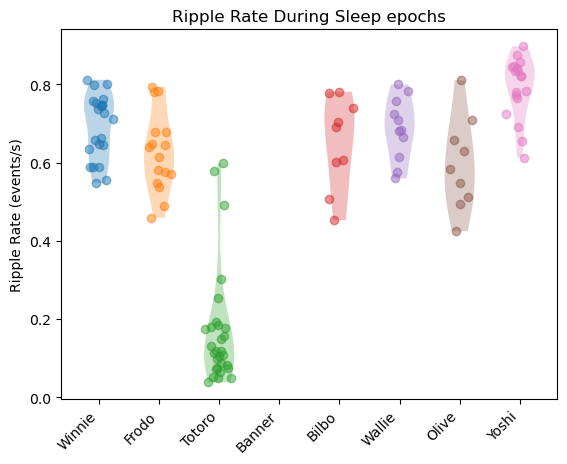

In [7]:
from spyglass.common import PositionIntervalMap,IntervalList


for loc, animal in enumerate(animal_list):
    dataset_key = {'animal':animal,
                #    "period_ms":80,
                "min_pulse_length":20,
                "track_type":'wtrack'
                
                }


    # get sleep interval sets
    dataset = filter_opto_data(dataset_key,)
    nwb_file_set = np.unique(dataset.fetch("nwb_file_name"))
    nwb_file_names = []
    interval_list_names = []
    for nwb_file_name in nwb_file_set:
        sleep_interval_names = (PositionIntervalMap & {'nwb_file_name':nwb_file_name,
                            } & "interval_list_name LIKE '%sleep%'").fetch("position_interval_name")
        for interval in sleep_interval_names:
            nwb_file_names.append(nwb_file_name)
            interval_list_names.append(interval)
            
    ripple_rate = []
    for nwb_file_name, interval_list_name in zip(nwb_file_names, interval_list_names):
        ripple_key = {"nwb_file_name":nwb_file_name,
                    "target_interval_list_name":interval_list_name,}
        basic_key = {"nwb_file_name":nwb_file_name,
                    "interval_list_name":interval_list_name,}
        if not RippleTimesV1() & ripple_key:
            print("No ripples for {}".format(ripple_key))
            continue
        


        ripple_df = (RippleTimesV1() & ripple_key).fetch1_dataframe()
        all_ripples = [[start, end] for start, end in zip(ripple_df.start_time, ripple_df.end_time)]
        
        len_sleep = np.sum([end-start for start, end in (IntervalList & basic_key).fetch1('valid_times')])
        ripple_rate.append(len(all_ripples)/len_sleep)
    
    if not ripple_rate:
        continue       
    plt.violinplot(ripple_rate, positions=[loc], showextrema=False, widths=.5)
    plt.scatter(np.ones(len(ripple_rate))*loc+np.random.normal(0,.1,len(ripple_rate)), ripple_rate, alpha=.5)
    

plt.xticks(np.arange(len(animal_list)), animal_list, rotation=45, ha='right')
plt.ylabel("Ripple Rate (events/s)")
plt.title("Ripple Rate During Sleep epochs")

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fdc4b7e1c70>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fdc4b7e1bb0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fdc4b7f3610>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fdc4b7f39a0>}

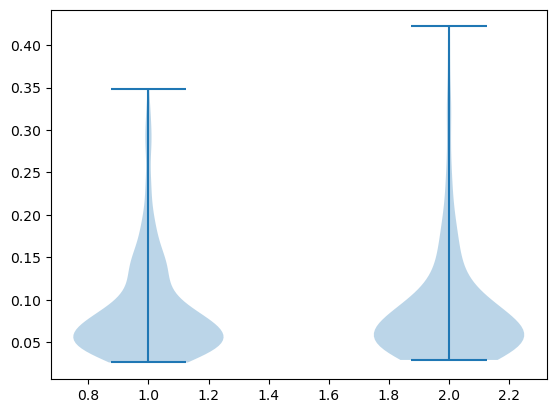

In [48]:
test_ripple_lengths = [end-start for start, end in test_ripples]
control_ripple_lengths = [end-start for start, end in control_ripples]

len_test = np.sum([end-start for start, end in test_intervals])
len_control = np.sum([end-start for start, end in control_intervals])
import matplotlib.pyplot as plt
plt.violinplot([test_ripple_lengths, control_ripple_lengths])